#  <center >Détection des communautés avec Python

La détection de communautés dans les réseaux sociaux a pour objectif d’identifier les
groupes d’individus entretenant des relations privilégiées. Ce thème connaît une
recrudescence d’intérêt ces dernières années avec le développement des médiaux
sociaux (Twitter, Facebook, etc.), multipliant les opportunités d’interactions entre les
individus. Un réseau social est souvent représenté par un graphe où les sommets
(nœuds) représentent les individus, les liens qu’il entretiennent sont matérialisés par les
arêtes. Une communauté correspond à un groupe de nœuds présentant une forte
densité de connexions.

Nous nous plaçons dans une situation particulière où le graphe est non orienté, les liaisons entre les individus – lorsqu’elles existent – sont symétriques et non pondérées c.-à-d. les connexions ont tous la même intensité.

Nous travaillerons sous **Python** et nous utiliserons le package **igraph** 'see https://igraph.org/python/. 
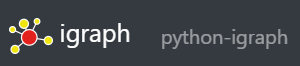

### 1. Installation du package igraph

In [2]:
!pip install python-igraph
!pip install Pycairo 
# Pycairo nécessaire aux représentations graphiques des graphes 

### 2. Données « Club de karaté de Zachary »

Le « Club de Karaté de Zachary » est composé de 34 membres. Il s’agit d’un exemple de
réseau social bien connu (https://en.wikipedia.org/wiki/Zachary's_karate_club). Un conflit
entre l’administrateur et l’entraîneur a abouti à une scission de la structure : une partie des membres a suivi l’entraîneur; tandis que dans l’autre, certains ont trouvé un
nouvel instructeur, d’autres ont abandonné le Karaté.

**Le réseau est décrit par une matrice d’adjacence booléenne (valeurs 1/0) symétrique indiquant les relations privilégiées (ou non) qu’entretiennent les membres.**

In [3]:
#chargement des données
import pandas
#header = 0  première ligne (n°0) = étiquette des colonnes
#index_col = 0  première colonne (n°0) = étiquette des lignes
dfAdj = pandas.read_table("karate.txt",header=0,index_col=0)

In [4]:
dfAdj

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34
Personnes,,,,,,,,,,,,,,,,,,,,,
p1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
p2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
p3,1,1,0,1,0,0,0,1,1,1,...,0,0,0,1,1,0,0,0,1,0
p4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
p5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p7,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p8,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


### Tasks
<li>Dans un premier temps, notre tâche consistera à identifier les deux leaders en utilisant la notion de centralité.
<li>Dans un deuxième temps, nous essayerons de faire ressortir les communautés issues de la partition du club.**

In [5]:
#affichage des informations
n = dfAdj.shape[0]
print(n)
print(dfAdj.index)
#.index contient les étiquettes des individus.

34
Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11',
       'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21',
       'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31',
       'p32', 'p33', 'p34'],
      dtype='object', name='Personnes')


In [6]:
#Nous transformons la structure DataFrame (librairie pandas) en une matrice de type numpy.
#transformer en matrice
MAdj = dfAdj.to_numpy()
print(MAdj)

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


### Construction du graphe et représentation graphique

In [7]:
#Nous importons la librairie igraph, nous vérifions le numéro de version.
#igraph
import igraph
print(igraph.__version__)
#Il faudra vérifier ce numéro si vous tentez de reproduire les calculs et que vous obtenez des résultats incohérents.

0.9.10


In [8]:
#Nous créons le graphe à partir de la matrice d’adjacence, il est non-orienté.
#création du graphe
g = igraph.Graph.Adjacency(MAdj.tolist(),mode=igraph.ADJ_UNDIRECTED)
print(g)
#Python affiche les p = 78 connexions existantes entre les n = 34 sommets (n° 0 à 33)

IGRAPH U--- 34 78 --
+ edges:
 0 --  1  2  3  4  5  6  7  8 10 11 12 13 17 19 21 31      25 -- 23 24 31
 1 --  0  2  3  7 13 17 19 21 30                           26 -- 29 33
 2 --  0  1  3  7  8  9 13 27 28 32                        27 --  2 23 24 33
 3 --  0  1  2  7 12 13                                    28 --  2 31 33
 4 --  0  6 10                                             29 -- 23 26 32 33
 5 --  0  6 10 16                                          30 --  1  8 32 33
 6 --  0  4  5 16                                          31 --  0 24 25 28
32 33
 7 --  0  1  2  3                                          32 --  2  8 14 15
18 20 22 23 29 30 31 33
 8 --  0  2 30 32 33                                       33 --  8  9 13 14
15 18 19 20 22 23 26 27 28 29 30 31 32
 9 --  2 33
10 --  0  4  5
11 --  0
12 --  0  3
13 --  0  1  2  3 33
14 -- 32 33
15 -- 32 33
16 --  5  6
17 --  0  1
18 -- 32 33
19 --  0  1 33
20 -- 32 33
21 --  0  1
22 -- 32 33
23 -- 25 27 29 32 33
24 -- 25 27 31


Par exemple, l’individu n°10 (correspondant à l’étiquette p11) est relié aux individus n° 0, 4
et 5. Pour faciliter les manipulations, nous pouvons attribuer des noms aux sommets du graphe

In [10]:
#attribuer des noms aux sommets
g.vs["name"] = dfAdj.index.tolist()
print(g.vs[10]["name"])

p11


Nous constatons ainsi que le nom de l’individu n°10 est bien p11.

Maintenant les accès sont plus faciles et lisibles. 

Pour disposer du nombre de voisins de p11 par exemple, nous ferons : 

In [11]:
#nombre de voisins de p11
print(g.neighborhood_size("p11"))

4


In [12]:
#Pour afficher la liste :
#voisinage de p11
print(g.neighborhood("p11"))


[10, 0, 4, 5]


Nous retrouvons l’individu n°10 dans le lot… 10 se compte lui-même comme voisinage.

In [13]:
#La lecture est plus facile si nous affichons plutôt leurs noms :
#si on souhaite avoir leurs noms
print(g.vs[g.neighborhood("p11")]['name'])


['p11', 'p1', 'p5', 'p6']


### Représentation graphique
Pour rendre la représentation graphique plus lisible, nous devons tout d’abord étiqueter
les sommets (dans le paragraphe précédent, nous les avions nommés) avant de lancer la
commande plot(). Les options invoquées lors de l’appel de plot() sont essentiellement
d’ordre cosmétique.

p1


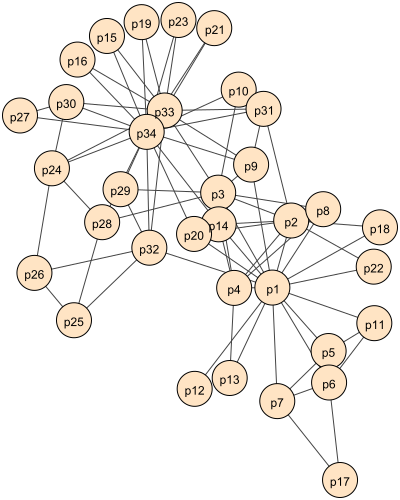

In [14]:
#attribuer des étiquettes aux sommets
g.vs['label'] = dfAdj.index.tolist()
print(g.vs[0]['label'])

#affichage du graphe
obj = igraph.plot(g,vertex_label_size=12,vertex_size=35,vertex_color='#ffe4c4',bbox=(0, 0, 400, 500))
obj

Visuellement, on croit deviner les deux blocs opposés, ainsi que les individus centraux au
sein d’entre eux. 
Nous verrons si cette intuition est confirmée par le calcul dans la section
suivante.

### Notion de centralité
#### Identification des nœuds centraux
La centralité indique l’importance d’un sommet dans un graphe. 
<li>Elle peut être quantifié simplement par son voisinage, un nœud est central s’il a beaucoup de voisins (degré de centralité) ; 
<li>elle peut l’être en termes de distance, un nœud central est peu éloigné des autres (centralité closeness) ; 
<li>ou plus subtilement, il constitue un nœud de passage du plus court chemin pour transiter d’un sommet à l’autre (centralité betweenness). 

Dans ce qui suit, nous mettrons en évidence les 5 individus les plus « centraux » au regard de ces différentes mesures.

**Degré de centralité**

Les informations relatives aux sommets sont accessibles à travers la propriété **.vs** de
l’objet graphe. Ainsi, pour obtenir les degrés de centralité, nous ferons :

In [15]:
#degré de centralité
print(g.vs.degree())

[16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


La lecture est plus facile si nous affichons les valeurs les plus importantes par ordre décroissant en les associant aux noms des nœuds.


In [16]:
#affichage des 5 premiers sommets, tri de manière décroissante
valeurs = {'node_name':g.vs['name'],'degree':g.vs.degree()}
print(pandas.DataFrame.from_dict(valeurs).sort_values(by='degree',ascending=False).iloc[:5,:])

   node_name  degree
33       p34      17
0         p1      16
32       p33      12
2         p3      10
1         p2       9


**Centralité closeness**

In [18]:
#Nous réalisons les mêmes opérations pour ce second indicateur.
#closeness centralité
valeurs = {'node_name':g.vs['name'],'closeness':g.vs.closeness()}
print(pandas.DataFrame.from_dict(valeurs).sort_values(by='closeness',ascending=False).iloc[:5,:])

   node_name  closeness
0         p1   0.568966
2         p3   0.559322
33       p34   0.550000
31       p32   0.540984
13       p14   0.515625


**Centralité betweenness**

In [19]:
#betweenness centralité
valeurs = {'node_name':g.vs['name'],'betweenness':g.vs.betweenness()}
print(pandas.DataFrame.from_dict(valeurs).sort_values(by='betweenness',ascending=False).iloc[:5,:])


   node_name  betweenness
0         p1   231.071429
33       p34   160.551587
32       p33    76.690476
2         p3    75.850794
31       p32    73.009524


Manifestement, les individus p1 et p34 sont au centre des relations
entre les membres du club. Il est fort à parier qu’ils correspondent (dans le désordre) à
l’administrateur et de l’entraîneur du club .

Nous les faisons ressortir dans le
graphe social en utilisant des jeux de couleurs adéquats.

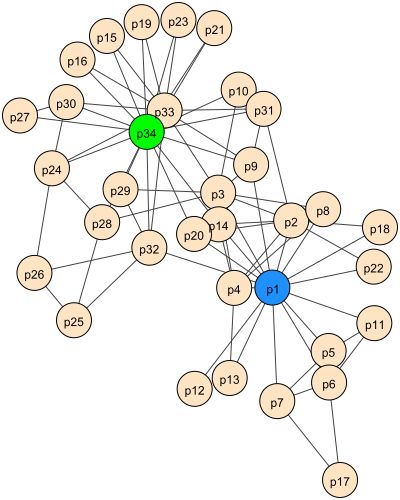

In [20]:
#graphe mettant en évidence p1 (n°0) et p34 (n°33)
g.vs['color'] = '#ffe4c4'
g.vs[0]['color'] = '#1e90ff'#blue
g.vs[33]['color'] = 'green'#green
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=12,vertex_size=35,bbox=(0, 0, 400, 500))
obj

#### Identification des individus relais

Les problèmes surgissent souvent lorsque les personnes ne se parlent plus .
Est certains individus pouvaient jouer le rôle de relais entre ces deux leaders. 
Pour ce faire, affichons les plus courts chemins menant de p1 à p34 (et inversement puisque le graphe est non orienté).


In [21]:
#plus court chemin entre p1 et p34
print(g.get_all_shortest_paths('p1','p34'))

[[0, 31, 33], [0, 19, 33], [0, 13, 33], [0, 8, 33]]


Plusieurs individus peuvent jouer le rôle d’intermédiaires directs entre ‘p1’ et ‘p34’……, à savoir : les n°31, 19, 13 et 8.

Mettons-les en évidence dans le graphe :

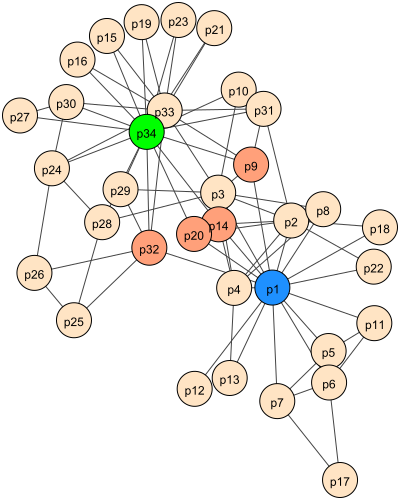

In [22]:
#mettre en évidence les individus relais
for v in g.get_all_shortest_paths('p1','p34'):
 g.vs[v[1]]['color'] = '#ffa07a'
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=12,vertex_size=35,bbox=(0, 0, 400, 500))
obj

## Découverte de communautés

Il existe plusieurs techniques de subdivision des graphes permettant de délimiter les
communautés . Dans ce tutoriel, nous nous intéressons à une approche divisive basée sur la notion de « edge betweenness ».
Nous obtenons une partition nette (crisp) c.-à-d. un individu appartient à un et un seul
groupe. La solution a le mérite de la simplicité. Mais, tout comme en classification
automatique (clustering), nous savons qu’elle ne correspond pas toujours à la réalité.
Nous pouvons avoir des communautés chevauchantes c.-à-d. un individu peut appartenir
à différentes classes à des degrés divers. Dans notre exemple en l’occurrence, la question
ne se pose pas. Après l’éclatement du club, les personnes ont choisi leur camp.

**Edge betweenness**

L’edge betweenness représente la fréquence avec laquelle une connexion est empruntée
lorsque l’on considère les plus courts chemins entre chaque paire de nœuds. Plus la valeur
est élevée, plus la connexion est importante car on peut considérer qu’elle établit un
« pont » entre des sommets voire des groupes de sommets.


Nous calculons les valeurs edge betweenness de chaque connexion.

In [23]:
#récupération des edge betweenness
eb = g.edge_betweenness()
print(eb)

[14.166666666666664, 43.638888888888886, 11.5, 29.333333333333332, 43.83333333333333, 43.833333333333336, 12.80238095238095, 41.64841269841271, 29.333333333333332, 33.0, 26.099999999999994, 23.77063492063493, 22.509523809523817, 25.770634920634926, 22.509523809523813, 71.39285714285714, 13.033333333333335, 4.333333333333333, 4.164285714285714, 6.959523809523811, 10.490476190476187, 8.20952380952381, 10.490476190476189, 18.10952380952381, 12.583333333333332, 14.145238095238092, 5.147619047619047, 17.28095238095238, 4.28095238095238, 23.10873015873016, 12.780952380952376, 38.70158730158729, 1.8880952380952383, 6.899999999999997, 8.37142857142857, 2.6666666666666665, 1.6666666666666665, 1.6666666666666667, 2.6666666666666665, 16.5, 16.5, 5.5, 17.077777777777776, 22.684920634920633, 16.614285714285714, 38.04920634920634, 13.511111111111113, 19.488888888888887, 13.511111111111113, 19.488888888888887, 13.511111111111113, 19.488888888888887, 33.31349206349207, 13.511111111111113, 19.488888888

Identifions la connexion la plus forte au sens de notre critère…

In [24]:
#transformer en vecteur numpy
import numpy
ebn = numpy.array(eb)
print(ebn)

[14.16666667 43.63888889 11.5        29.33333333 43.83333333 43.83333333
 12.80238095 41.6484127  29.33333333 33.         26.1        23.77063492
 22.50952381 25.77063492 22.50952381 71.39285714 13.03333333  4.33333333
  4.16428571  6.95952381 10.49047619  8.20952381 10.49047619 18.10952381
 12.58333333 14.1452381   5.14761905 17.28095238  4.28095238 23.10873016
 12.78095238 38.7015873   1.88809524  6.9         8.37142857  2.66666667
  1.66666667  1.66666667  2.66666667 16.5        16.5         5.5
 17.07777778 22.68492063 16.61428571 38.04920635 13.51111111 19.48888889
 13.51111111 19.48888889 13.51111111 19.48888889 33.31349206 13.51111111
 19.48888889 13.51111111 19.48888889 11.09444444  5.91111111  3.73333333
 12.53333333 18.32777778  2.36666667 10.46666667 22.5        23.59444444
  2.54285714 30.45714286 17.09761905  8.33333333 13.78095238 13.08730159
 16.72222222  9.56666667 15.04285714 23.24444444 29.95396825  4.61428571]


In [25]:
#récupérer l'indice de la valeur maximale
iebn = numpy.argmax(ebn)
print(iebn)

15


Il s’agit de la connexion n°15 que nous pouvons souligner dans le graphe.

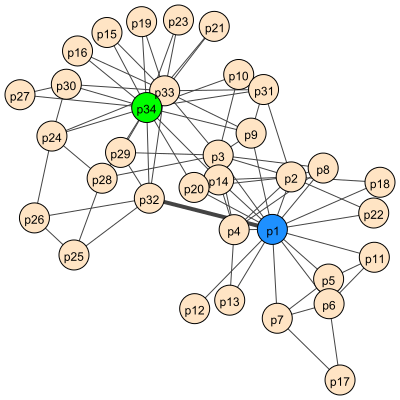

In [26]:
#mettre en évidence la connexion n°iebn (n°15)
g.vs['color'] = '#ffe4c4'
g.vs[0]['color'] = '#1e90ff'
g.vs[33]['color'] = 'green'
g.es['width'] = 1
g.es[iebn]['width'] = 4
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=12,vertex_size=30,bbox=(0, 0, 400, 400))
obj


Elle relie les sommets p1 et p32.

**Algorithme de construction des communautés**

L’approche divisive consiste à retirer itérativement les connexions présentant les valeurs
les plus élevées d’edge betweenness. Voici le pseudocode de l’algorithme.
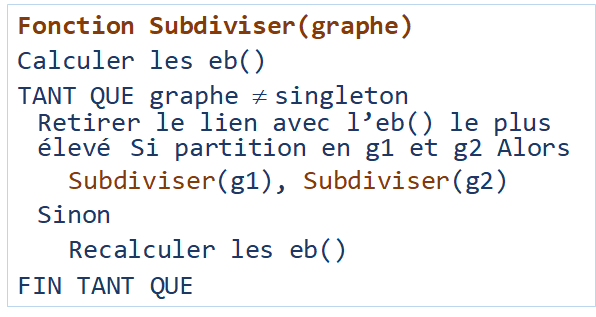

Lors du retrait d’une connexion, nous faisons face à une alternative : soit il n’a pas
engendré de partition du graphe, auquel cas nous recalculons les edge betweenness, en
effet les plus courts chemins entre les paires de sommets peuvent être modifiés, et nous
recommençons ; soit il a engendré une partition en deux sous-graphes, nous travaillons
alors récursivement sur les sous-groupes. Les subdivisions successives peuvent être
illustrées par un dendrogramme qui part de la non-partition (un seul groupe) jusqu’à la
partition triviale (un sommet = un groupe).

Voyons ce qu’il en est sur les données « Karaté »

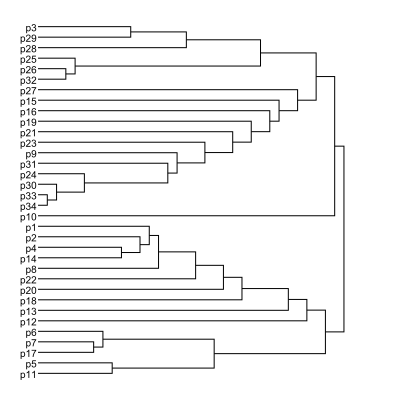

In [27]:
#construction de communautés avec edge betweenness
res = g.community_edge_betweenness(directed=False)
#affichage du dendrogramme
igraph.plot(res ,bbox=(0, 0, 400, 400))


Dans une éventuelle partition en deux groupes, nous remarquons que les fauteurs de
troubles que sont les individus p1 et p34 seront effectivement séparés. Nous demandons
cette solution explicitement :

In [28]:
#couper en 2 groupes
sol = res.as_clustering(n=2)
print(sol)

Clustering with 34 elements and 2 clusters
[0] p1, p2, p4, p5, p6, p7, p8, p11, p12, p13, p14, p17, p18, p20, p22
[1] p3, p9, p10, p15, p16, p19, p21, p23, p24, p25, p26, p27, p28, p29, p30,
    p31, p32, p33, p34


Nous pouvons les faire apparaître explicitement dans le graphe :

In [29]:
for v in sol:
    print(v)

[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


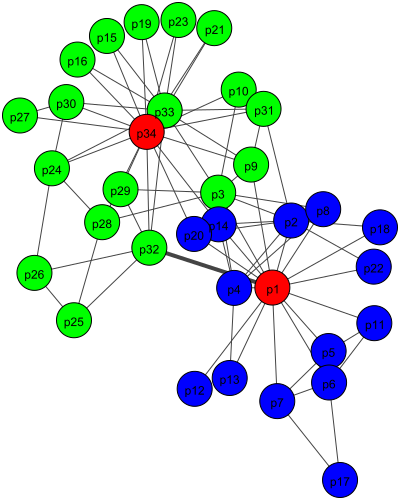

In [30]:
for i in sol[0]:
    g.vs[i]['color'] = 'blue'
for i in sol[1]:
    g.vs[i]['color'] = 'green'
g.vs[0]['color'] = 'red'
g.vs[33]['color'] = 'red'
obj = igraph.plot(g,vertex_label_color='black',vertex_label_size=12,vertex_size=35,bbox=(0, 0, 400, 500))
obj

Parmi les 4 individus qui pouvaient jouer le rôle de relais entre les deux leaders , deux ont pris parti pour p1 (p20 et p14), les deux autres ont choisi p34 (p9 et p32).


### TO DO 

Analyse the ZKC graph using Networkx
<li>Environment Set Up
<li>Import the ZKC graph
<li>Visualise the graph we have just imported
<li>Network Statistics (Exploratory Analysis)
<li>Community Detection

# Environment Set Up

In [31]:
!pip install networkx

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Import the ZKC graph

In [35]:
ZKC_graph = nx.karate_club_graph()
ZKC_graph

# Visualise the graph we have just imported

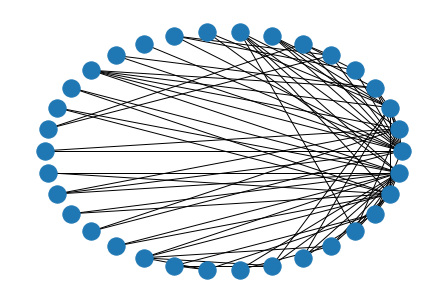

In [36]:
circ_pos = nx.circular_layout(ZKC_graph) 
nx.draw(ZKC_graph,circ_pos)

# Network Statistics (Exploratory Analysis)

In [37]:
# The edge density 
str(nx.density(ZKC_graph))

'0.13903743315508021'

In [38]:
# DegreeView object
degree = ZKC_graph.degree()

degree

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [60]:
# The average degree
degree_list = []

for (n,d) in degree:
    degree_list.append(d)

str(sum(degree_list) / len(degree_list))

'4.588235294117647'

Text(0.5, 1.0, 'Node Degree')

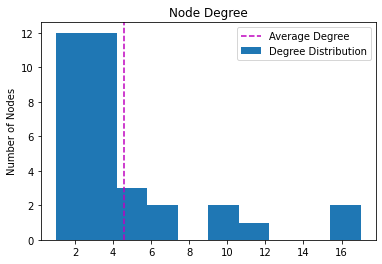

In [63]:
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='m',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Node Degree')

In [46]:
#local clustering coefficient
local_clustering_coefficient = nx.algorithms.cluster.clustering(ZKC_graph)
local_clustering_coefficient


{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [47]:
#average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)
av_local_clustering_coefficient


0.5706384782076823

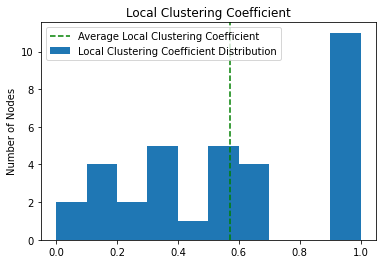

In [64]:
#similarly to the degree lets plot the local clustering coefficient distribution
plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='g',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

# Community Detection

In [49]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

#preform the community detection
c = list(greedy_modularity_communities(ZKC_graph))

#Let's find out how many communities we detected
print(len(c))

3


In [50]:
#Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


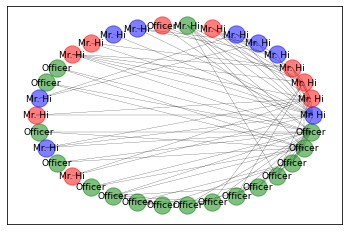

In [68]:
#draw each set of nodes in a seperate colour
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_2, node_color='b', alpha=0.5)
club_labels = nx.get_node_attributes(ZKC_graph,'club')
#now we can add edges to the drawing 
nx.draw_networkx_edges(ZKC_graph,circ_pos,width = 0.2)

#finally we can add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(ZKC_graph,circ_pos,club_labels,font_size=9)

plt.show()

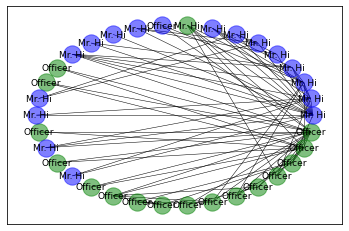

In [69]:
combined_community = community_1 + community_2

#draw the network as before
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=combined_community, node_color='b', alpha=0.5)

nx.draw_networkx_edges(ZKC_graph, circ_pos,width = 0.5)

nx.draw_networkx_labels(ZKC_graph, circ_pos, club_labels, font_size=9)

plt.show()

# FIN
